# Loan Approval Preiction Model
This Classification Model predicts who is eligible to get a loan based on the likelihood of repaayement

The project aims to check the loan eligibility of the person i.e. if he/she will be able to repay the loan or not. This is a Classification Problem that predicts if a loan will get approved or not.  

In [1]:
import pandas as pd
import numpy as np #for mathematical purpose.
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r'C:\Users\HP\Downloads\py\LoanPredict\train.csv')
test = pd.read_csv(r'C:\Users\HP\Downloads\py\LoanPredict\test.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

In [7]:
train_original = train.copy()

In [8]:
test_original = test.copy()

In [9]:
Loan_ID=test_original.Loan_ID

In [10]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- object: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
- numerical: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History

In [12]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
train.duplicated().any()

False

In [14]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# EDA

The percentage of Y class : 0.69
The percentage of N class : 0.31


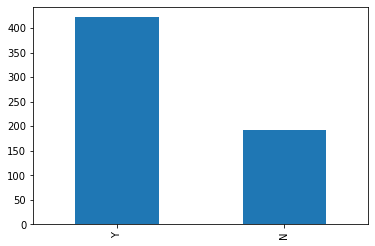

In [16]:
train['Loan_Status'].value_counts().plot.bar()
print('The percentage of Y class : %.2f' % (train['Loan_Status'].value_counts()[0] / len(train)))
print('The percentage of N class : %.2f' % (train['Loan_Status'].value_counts()[1] / len(train)))

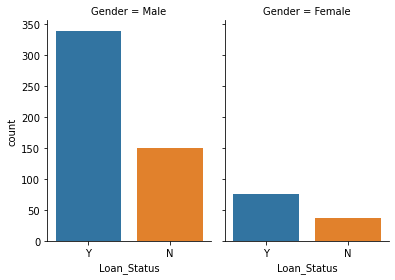

In [17]:
g = sns.catplot(x="Loan_Status", col="Gender",
                data=train, kind="count",
                height=4, aspect=.7);

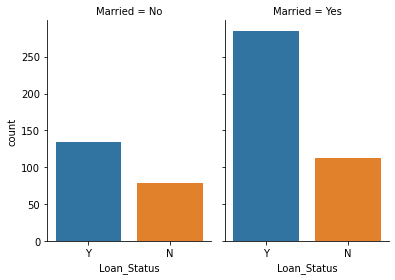

In [18]:
g = sns.catplot(x="Loan_Status", col='Married',
                data=train, kind="count",
                height=4, aspect=.7);

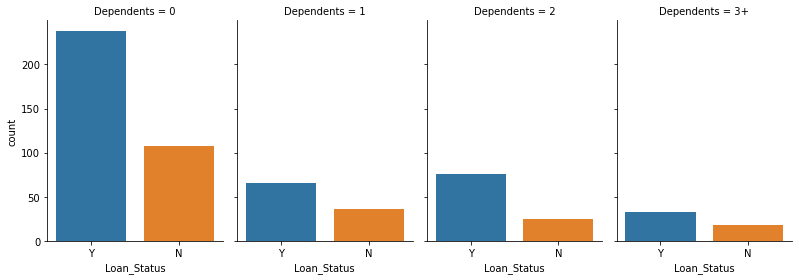

In [19]:
g = sns.catplot(x="Loan_Status", col='Dependents',
                data=train, kind="count",
                height=4, aspect=.7);

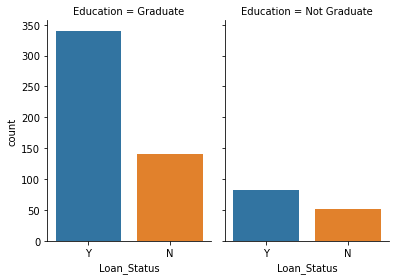

In [20]:
g = sns.catplot(x="Loan_Status", col= 'Education',
                data=train, kind="count",
                height=4, aspect=.7);

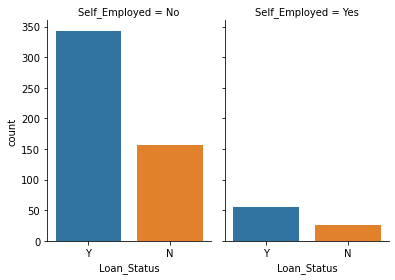

In [21]:
g = sns.catplot(x="Loan_Status", col=    'Self_Employed', 
                data=train, kind="count",
                height=4, aspect=.7);

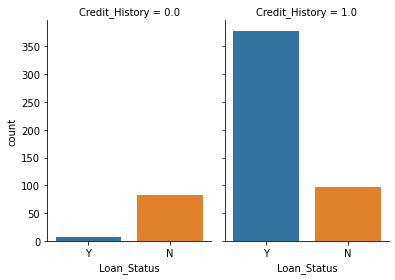

In [22]:
g = sns.catplot(x="Loan_Status", col = 'Credit_History',
                data=train, kind="count",
                height=4, aspect=.7);

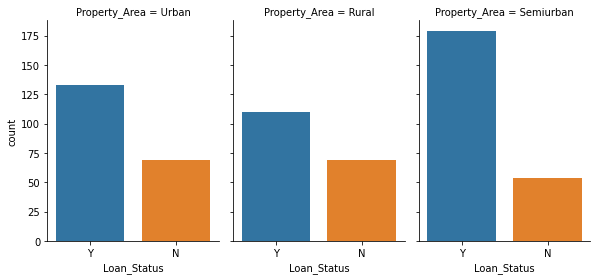

In [23]:
g = sns.catplot(x="Loan_Status", col= 'Property_Area',
                data=train, kind="count",
                height=4, aspect=.7);

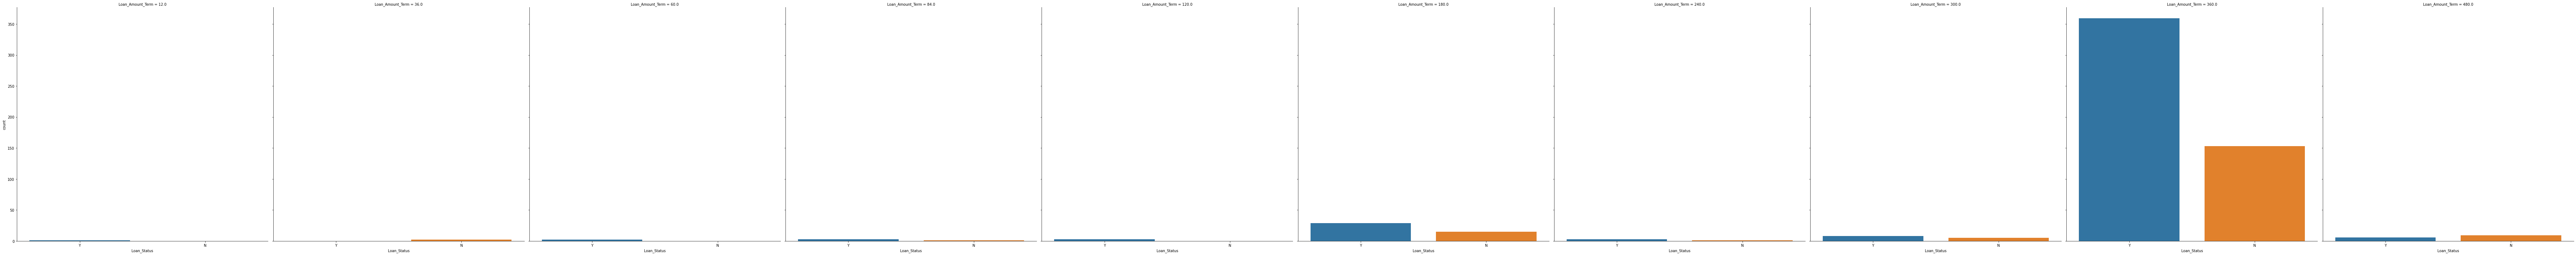

In [24]:
g = sns.catplot(x="Loan_Status", col= 'Loan_Amount_Term',
                data=train, kind="count",
                height=10, aspect=1);

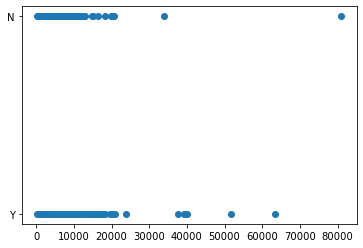

In [25]:
plt.scatter(train['ApplicantIncome'], train['Loan_Status']);

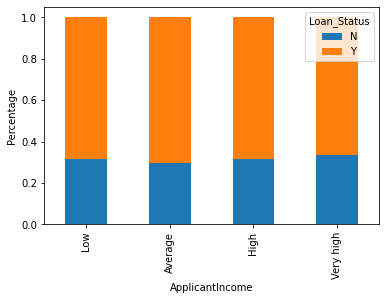

In [26]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very high']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels = group)
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis = 0).plot(kind ='bar',stacked = True) 
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

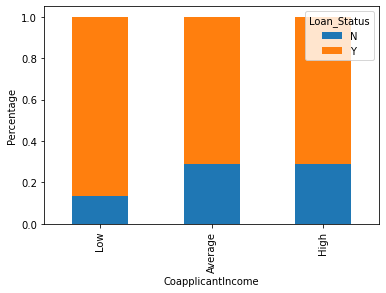

In [27]:
bins=[0,1000,2000,41000] 
group=['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels = group)
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis = 0).plot(kind ='bar',stacked = True) 
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.show()

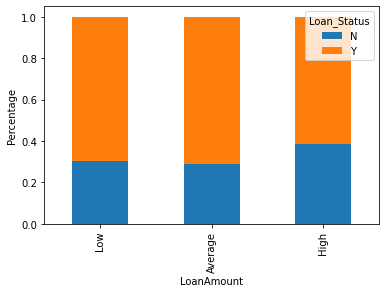

In [28]:
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins, labels = group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis = 0).plot(kind ='bar',stacked = True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.show()

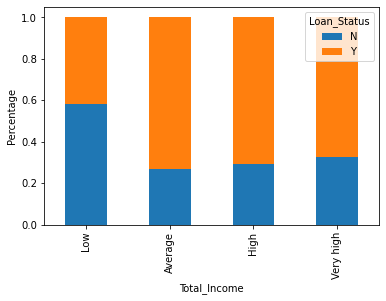

In [29]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels = group)
TotalIncome_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
TotalIncome_bin.div(TotalIncome_bin.sum(1).astype(float),axis = 0).plot(kind ='bar',stacked = True) 
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()

# Observations
**Plots above convey following things about the dataset:**
- Loan Approval Status: About 2/3rd of applicants have been granted loan.
- Sex: There are more Men than Women (approx. 3x)
- Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
- Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
- Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
- Employment: 5/6th of population is not self employed.
- Property Area: More applicants from Semi-urban and also likely to be granted loans.
- Applicant with credit history are far more likely to be accepted.
- Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

In [30]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,LoanAmount_bin,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,NaN,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,Average,6091.0,Very high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,Low,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,High,Average,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,Average,6000.0,High


In [31]:
train = train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income','Total_Income_bin'], axis=1)

In [32]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
train['Dependents'].replace('3+',3,inplace = True)
test['Dependents'].replace('3+',3,inplace = True)
train['Loan_Status'].replace('N',0,inplace = True)
train['Loan_Status'].replace('Y',1,inplace = True)

In [34]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


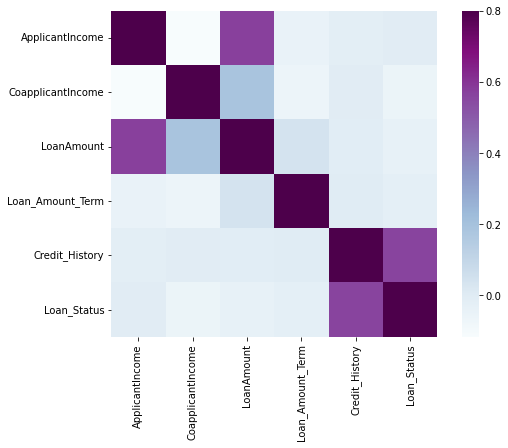

In [35]:
matrix = train.corr()
f,ax = plt.subplots(figsize =(9,6))
sns.heatmap(matrix,vmax = .8,square= True, cmap='BuPu')
plt.show()

# Data Preprocessing

In [36]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- **Categorical missing: Gender, Married, Dependents, Self_Employed, Property_Area, Loan_Status**
- **Numerical missing: LoanAmount, Loan_Amount_Term, Credit_History**

**Missing value imputation**

In [37]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
 

In [38]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)

In [39]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

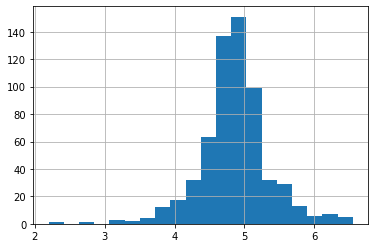

In [40]:
# To remove the skewness due to outliers, we use log transformation to get a normal distribution.
train['LoanAmount_log']= np.log(train['LoanAmount'])
test['LoanAmount_log']= np.log(test['LoanAmount'])
train['LoanAmount_log'].hist(bins = 20)

In [41]:
train['Total_Income']= train['ApplicantIncome']+ train['CoapplicantIncome']
test['Total_Income']= test['ApplicantIncome']+ test['CoapplicantIncome']

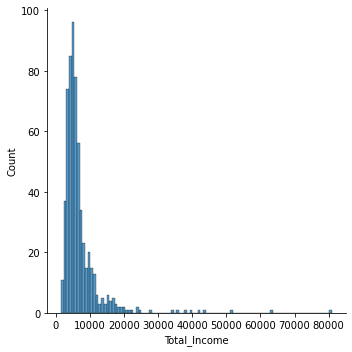

In [42]:
sns.displot(train['Total_Income'])

<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

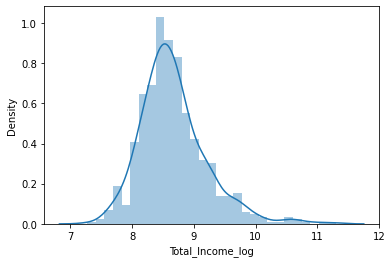

In [43]:
train['Total_Income_log']=np.log(train['Total_Income'])
test['Total_Income_log']=np.log(test['Total_Income'])
sns.distplot(train['Total_Income_log'])

**Creating new columns EMI=equated monthly instalment. and Balance Income**

In [44]:
#EMI = equated monthly instalment.
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

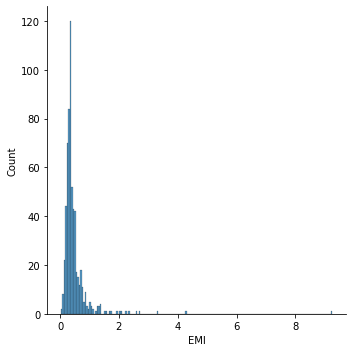

In [45]:
sns.displot(train['EMI'])

In [46]:
train['Balance_Income']=train['Total_Income'] - (train['EMI']*1000)
test['Balance_Income']=test['Total_Income'] - (test['EMI']*1000)

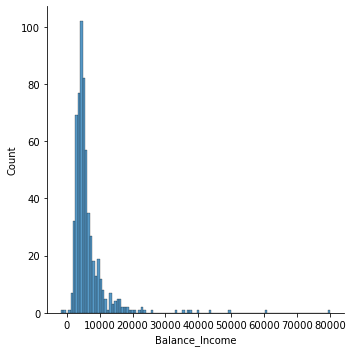

In [47]:
sns.displot(train['Balance_Income'])

**Dropping unnecessary columns**

In [48]:
train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','LoanAmount_log'], axis =1)
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','LoanAmount_log'], axis =1)

In [49]:
train = train.drop('Loan_ID', axis=1)
test= test.drop('Loan_ID', axis=1)

In [50]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,1,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,0,6091.0,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1,3000.0,8.006368,0.183333,2816.666667
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4941.0,8.505323,0.333333,4607.666667
4,Male,No,0,Graduate,No,1.0,Urban,1,6000.0,8.699515,0.391667,5608.333333


In [51]:
x = train.drop('Loan_Status',1)
y = train.Loan_Status

**Treating Categorical calumns**

In [52]:
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [53]:
x.head()

,Credit_History,Total_Income,Total_Income_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,5849.0,8.674026,0.355556,5493.444444,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,1.0,6091.0,8.714568,0.355556,5735.444444,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,1.0,3000.0,8.006368,0.183333,2816.666667,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,1.0,4941.0,8.505323,0.333333,4607.666667,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,1.0,6000.0,8.699515,0.391667,5608.333333,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


# Model Creation

**We are going to split train set to check for precision and recall metrics too, as we dont have target column in test set**

In [54]:
from sklearn.model_selection import train_test_split
data_splits = train_test_split(x, y, test_size=0.25, random_state=0,
                               shuffle=True, stratify=y)
X_train, X_test, y_train, y_test = data_splits

In [55]:
X_train.shape

(460, 20)

In [56]:
X_test.shape

(154, 20)

In [57]:
y_train.shape

(460,)

In [58]:
y_test.shape

(154,)

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [60]:
models=[]
models.append(("logreg",LogisticRegression()))
models.append(("tree",DecisionTreeClassifier()))
models.append(("lda",LinearDiscriminantAnalysis()))
models.append(("svc",SVC()))
models.append(("knn",KNeighborsClassifier()))
models.append(("nb",GaussianNB()))
models.append(("rfc",RandomForestClassifier()))

In [61]:
seed=7
scoring='accuracy'

In [62]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [63]:
for name,model in models:
    #print(model)
    kfold=KFold(n_splits=10,random_state=seed, shuffle= True)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

logreg 0.789130 0.065974
tree 0.695652 0.055849
lda 0.797826 0.055039
svc 0.682609 0.039130
knn 0.613043 0.038644
nb 0.791304 0.046828
rfc 0.782609 0.065938


**Stepwise model top 3 models' metrics evaluation : precision, recall, accuracy**

- **Precision (False Positive measure)** In this case, it is okay to predict a person Not Eligible, but in fact that person is eligible in reality
- **Recall (False Negative measure)** However, if we predict a person is eligible if in the reality he/she is not-eligible is a big problem, because in that case it is more likely that he/she will become default on loan. It could mean loss of business.So in this case Recall is important to correctly point out those customers that are not Eligible
 

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Logistic Regression

In [65]:

clf=LogisticRegression()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred,target_names = ['Loan Not Given', 'Loan Given']))


0.8246753246753247
[[ 23  25]
 [  2 104]]
                precision    recall  f1-score   support

Loan Not Given       0.92      0.48      0.63        48
    Loan Given       0.81      0.98      0.89       106

      accuracy                           0.82       154
     macro avg       0.86      0.73      0.76       154
  weighted avg       0.84      0.82      0.81       154



In [66]:
import tensorflow as tf

Text(0.5, 1.0, 'Logistic Regression Model: Confusion Matrix')

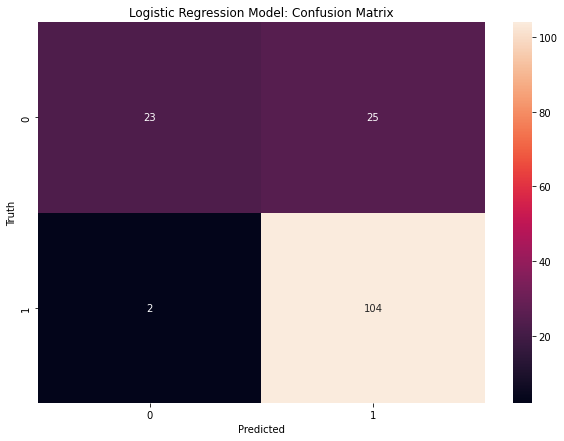

In [67]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Logistic Regression Model: Confusion Matrix')

# Guassian Naive Bayes

In [94]:

clf=GaussianNB()  
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred,target_names = ['Loan Not Given', 'Loan Given']))


0.8181818181818182
[[ 25  23]
 [  5 101]]
                precision    recall  f1-score   support

Loan Not Given       0.83      0.52      0.64        48
    Loan Given       0.81      0.95      0.88       106

      accuracy                           0.82       154
     macro avg       0.82      0.74      0.76       154
  weighted avg       0.82      0.82      0.80       154



Text(0.5, 1.0, 'Guassian Naive Bayes Model: Confusion Matrix')

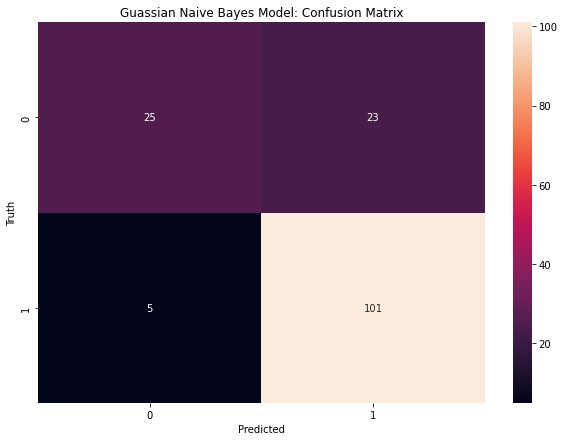

In [96]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Guassian Naive Bayes Model: Confusion Matrix')

# Linear Discriminant Analysis

In [97]:
clf=LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred,target_names = ['Loan Not Given', 'Loan Given']))

0.8311688311688312
[[ 23  25]
 [  1 105]]
                precision    recall  f1-score   support

Loan Not Given       0.96      0.48      0.64        48
    Loan Given       0.81      0.99      0.89       106

      accuracy                           0.83       154
     macro avg       0.88      0.73      0.76       154
  weighted avg       0.85      0.83      0.81       154



Text(0.5, 1.0, 'Linear Discriminant Analysis: Confusion Matrix')

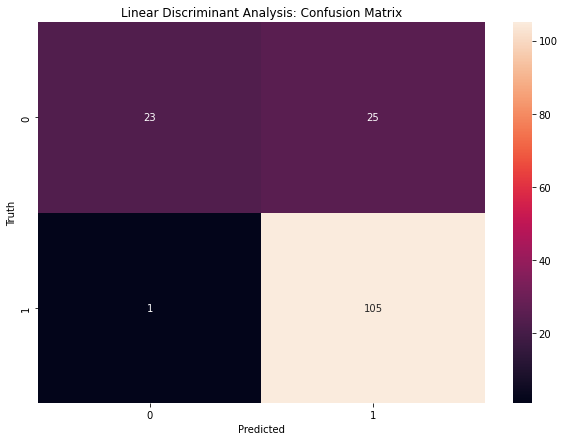

In [98]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Linear Discriminant Analysis: Confusion Matrix')

**It shows Linear Discriminative Analysis is best model to correctly  point out those customers that are going to get a loan (Eligible)**

# Apply LDA model on Test data set with no target column

In [99]:
test.isnull().sum()

Credit_History             29
Total_Income                0
Total_Income_log            0
EMI                        11
Balance_Income             11
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Dependents_3                0
Dependents_0                0
Dependents_1                0
Dependents_2                0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [100]:
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)
test['EMI'].fillna(test['EMI'].median(), inplace = True)
test['Balance_Income'].fillna(test['Balance_Income'].median(), inplace = True)

In [101]:
test.isnull().sum()

Credit_History             0
Total_Income               0
Total_Income_log           0
EMI                        0
Balance_Income             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_3               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [102]:
clf=LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)
pred=clf.predict(test)

In [103]:
outp=clf.predict(test).astype(int)
outp

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [114]:
df_output=pd.DataFrame()

In [115]:
df_output['Loan_Status'] = outp

In [122]:
df_output['Loan_Status'].replace(0, 'N', inplace = True)
df_output['Loan_Status'].replace(1, 'Y', inplace = True)

In [123]:
df_output['Loan_ID']=Loan_ID
 

In [124]:
df_output.head(15)

,Loan_Status,Loan_ID
0,Y,LP001015
1,Y,LP001022
2,Y,LP001031
3,Y,LP001035
4,Y,LP001051
5,Y,LP001054
6,Y,LP001055
7,N,LP001056
8,Y,LP001059
9,Y,LP001067


In [125]:
df_output[['Loan_ID','Loan_Status']].to_csv(r'C:\Users\HP\Downloads\py\LoanPredict\output_loan_eligible_predict.csv',index=False)